# Iris classification with decision trees

In [1]:
import sklearn
import sklearn.datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

sns.set(style='whitegrid')
np.random.seed(0)

def plot_scatter(x, y, labels, name='scatter'):    
    for i in range(len(labels)):
        plt.scatter(x[y == i, 0], x[y == i, 1], alpha=0.8, label=labels[i])
    plt.title(name)
    plt.legend()
    #plt.show()

def plot_tsne(x, y, labels, name='t-sne', pca_reduce=False):
    if pca_reduce:
        pca = PCA(n_components=2, random_state=0)
        x = pca.fit_transform(x)
    
    tsne = TSNE(n_components=2, random_state=0)
    X = tsne.fit_transform(x)
    
    plt.figure(figsize=(12, 8))
    
    for i in range(len(labels)):
        plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, label=labels[i])
    plt.title(name)
    plt.legend()
    plt.show()

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.ioff()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' #if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Dataset & Visualization

In [2]:
iris = sklearn.datasets.load_iris()

print('Loaded {} samples'.format(len(iris.data)))
print('Classes:', iris.target_names)

Loaded 150 samples
Classes: ['setosa' 'versicolor' 'virginica']


Distribution of the dataset


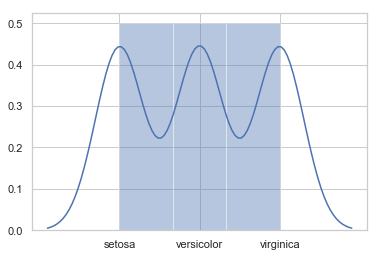

In [3]:
print('Distribution of the dataset')
sns.distplot(iris.target, kde=True)
plt.xticks(list(set(iris.target)), iris.target_names)
plt.show()

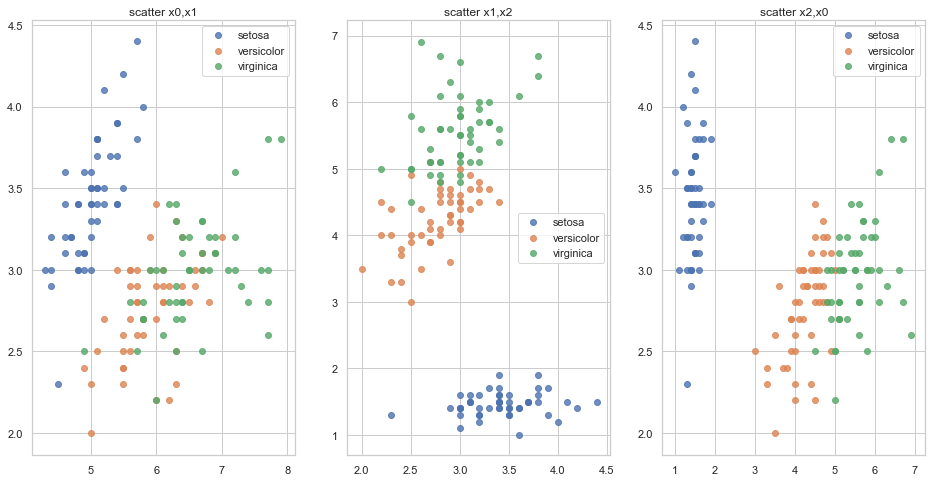

In [4]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plot_scatter(iris.data[:, :2], iris.target, iris.target_names, 'scatter x0,x1')

plt.subplot(1, 3, 2)
plot_scatter(iris.data[:, 1:], iris.target, iris.target_names, 'scatter x1,x2')

plt.subplot(1, 3, 3)
plot_scatter(iris.data[:, 2::-1], iris.target, iris.target_names, 'scatter x2,x0')

plt.show()

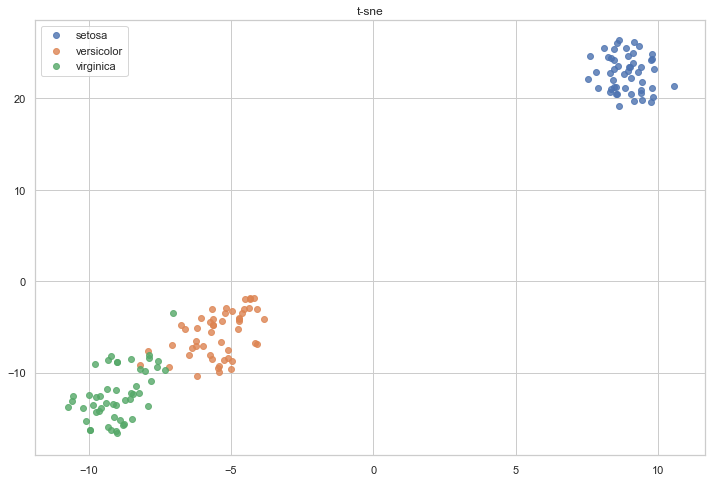

In [5]:
plot_tsne(iris.data, iris.target, iris.target_names)

## Split data in train/test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    iris.data, iris.target,
    test_size=50
)

Distributions of train/test sets


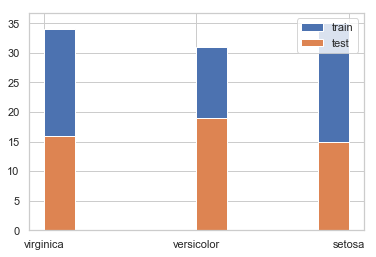

In [7]:
print('Distributions of train/test sets')

plt.hist(Y_train, label='train')
plt.hist(Y_test, label='test')
plt.xticks(Y_test, iris.target_names)
plt.legend()
plt.show()

## Creating a DecisionTree classifier

In [8]:
clf = sklearn.tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=300,
    min_samples_leaf=5,
    class_weight={0:1,1:1,2:1}
)

In [9]:
clf = clf.fit(X_train, Y_train)

In [10]:
predictions = clf.predict(X_test)

print('Predictions:\t', predictions[:20])
print('Ground:\t\t', Y_test[:20])

Predictions:	 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]
Ground:		 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]


In [11]:
from sklearn import metrics

accuracy = metrics.accuracy_score(Y_test, predictions)
f1_score = metrics.f1_score(Y_test, predictions, average='macro')

print('Accuracy: {:>8.2f}'.format(accuracy))
print('F1-score: {:>8.2f}'.format(f1_score))

Accuracy:     0.96
F1-score:     0.96


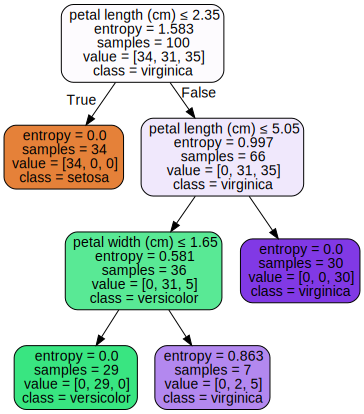

In [12]:
import graphviz

dot = sklearn.tree.export_graphviz(
    clf, feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True,
    special_characters=True
)

graphviz.Source(dot)

## Artificial inflation

In [13]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [16]:
clf = sklearn.tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=300,
    min_samples_leaf=5,
    class_weight={0:1, 1:4, 2:4}
)

clf = clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, predictions)
f1_score = metrics.f1_score(Y_test, predictions, average='macro')

print('Accuracy: {:>8.2f}'.format(accuracy))
print('F1-score: {:>8.2f}'.format(f1_score))

Accuracy:     0.92
F1-score:     0.92


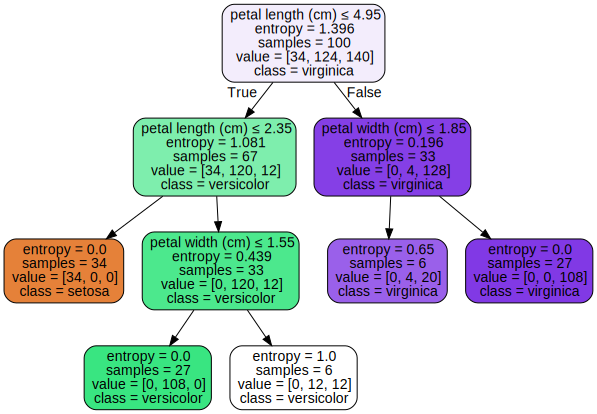

In [17]:
graphviz.Source(sklearn.tree.export_graphviz(
    clf, feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True,
    special_characters=True
))

## Reducing overfitting

Accuracy:     0.98
F1-score:     0.98


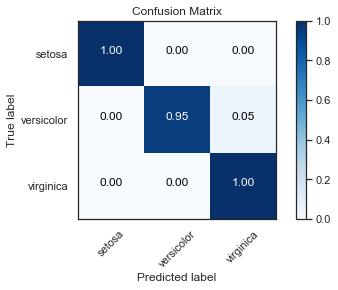

In [18]:
clf = sklearn.tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=300,
    max_depth=5,
    min_samples_leaf=4,
    min_impurity_decrease=0.1,
    class_weight={0:1, 1:5, 2:5}
)

clf = clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, predictions)
f1_score = metrics.f1_score(Y_test, predictions, average='macro')

print('Accuracy: {:>8.2f}'.format(accuracy))
print('F1-score: {:>8.2f}'.format(f1_score))

cm = metrics.confusion_matrix(Y_test, predictions)
sns.set(style='white')
plot_confusion_matrix(cm, iris.target_names, normalize=True)

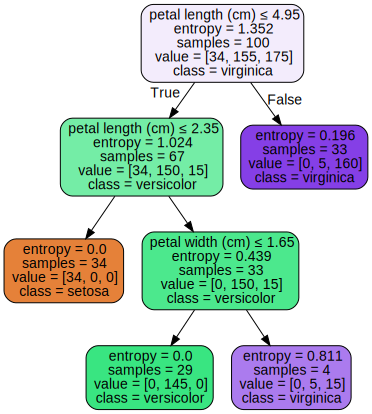

In [19]:
graphviz.Source(sklearn.tree.export_graphviz(
    clf, feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True,
    special_characters=True
))

## Cross Validation w/ Confusion Matrix

In [20]:
from sklearn.model_selection import StratifiedKFold

def cross_validation(clf, X, Y, names, n_folds=5, plot=True, plot_roc=False):
    all_accuracy = None
    all_f_score = None
    all_cm = None
    all_roc = list()
    
    kf = StratifiedKFold(n_splits=n_folds)
    for train_index, test_index in kf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        clf.fit(X_train, Y_train)
        predictions = clf.predict(X_test)
        accuracy = metrics.accuracy_score(Y_test, predictions)
        f_score = metrics.f1_score(Y_test, predictions, average='macro')
        cm = metrics.confusion_matrix(Y_test, predictions)
        
        if plot_roc:
            probs = clf.predict_proba(X_test)
            for i in range(len(names)):
                roc = metrics.roc_curve(Y_test, probs[:, i], pos_label=i)
            all_roc.append(roc)
            
        if all_accuracy is None:
            all_accuracy = accuracy
            all_f_score = f_score
            all_cm = [cm]
        else:
            all_accuracy = np.append(all_accuracy, accuracy)
            all_f_score = np.append(all_f_score, f_score)
            all_cm = np.append(all_cm, [cm], axis=0)
    
    if plot:
        sns.set(style='white')
        plt.figure(figsize=(20, 20))
        for i in range(n_folds):
            plt.subplot(int(n_folds/2)+2, 2, i+1)
            plot_confusion_matrix(all_cm[i], names, title='Fold {}'.format(i))

            if i == n_folds-1:
                plt.subplot(int(n_folds/2)+2, 2, i+2)
                mean_cm = np.mean(all_cm, axis=0)
                plot_confusion_matrix(mean_cm, names, normalize=True, title='Mean CM')
        plt.show()

        sns.set()
        plt.figure(figsize=(18, 10))
        plt.plot(all_accuracy, label='accuracy')
        plt.plot(all_f_score, label='f_score')
        plt.xticks(np.arange(n_folds), [i for i in range(n_folds)])
        plt.legend()
        plt.xlabel('Fold')
        plt.show()
        
    if plot_roc:
        plt.figure(figsize=(18, 9))
        for fold, (fpr, tpr, thresholds) in enumerate(all_roc):
            for i in range(len(iris.target_names)):
                #fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs[:, i], pos_label=i)
                auc = metrics.auc(fpr, tpr)
                plt.plot(
                    fpr, tpr, lw=3, 
                    label=iris.target_names[i] + ' (Fold {}, AUC: {:2f})'.format(fold, auc), 
                    alpha=0.8
                )

        plt.plot([0,1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
        plt.legend()
        plt.title('ROC Curve')
        plt.show()
    
    print('Accuracy:', all_accuracy, 'mean: {:.2f}'.format(np.mean(all_accuracy)))
    print('F1-Score:', all_f_score,  'mean: {:.2f}'.format(np.mean(all_f_score)))
        
    return all_accuracy, all_f_score, all_cm

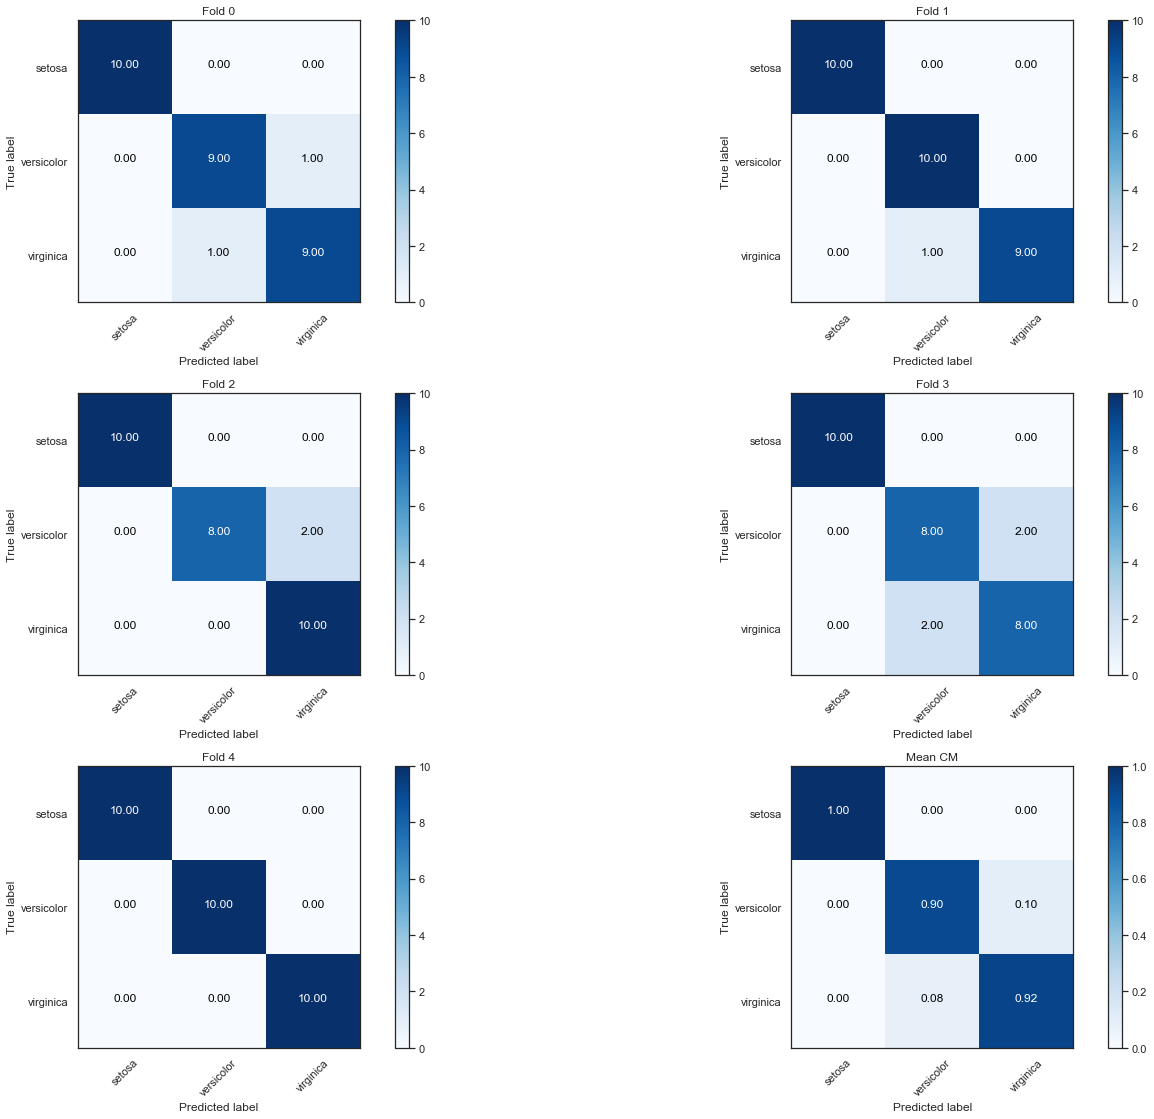

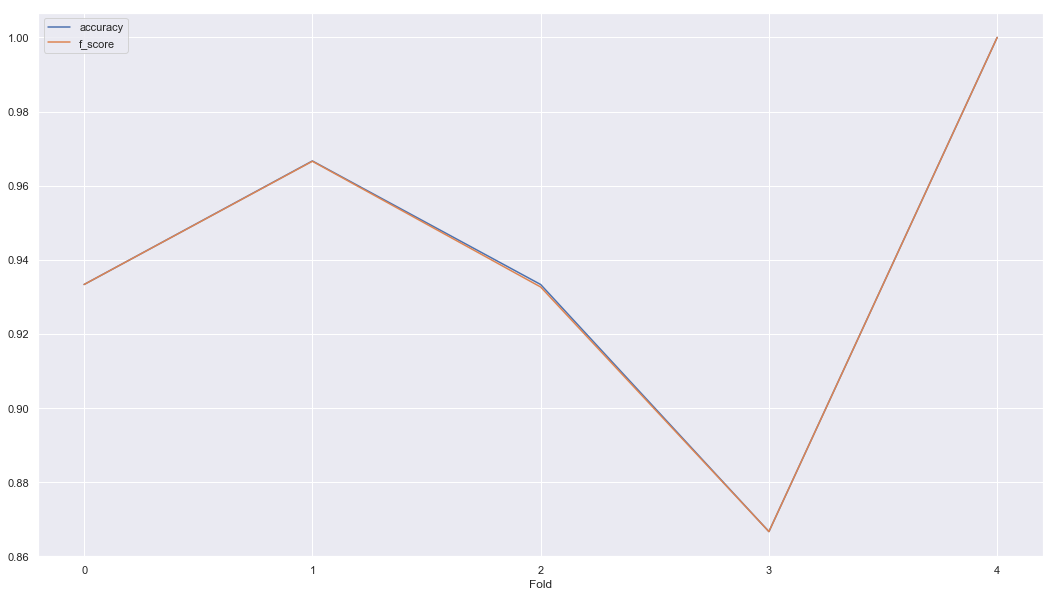

Accuracy: [0.93333333 0.96666667 0.93333333 0.86666667 1.        ] mean: 0.94
F1-Score: [0.93333333 0.96658312 0.93265993 0.86666667 1.        ] mean: 0.94


In [21]:
cv = cross_validation(
    sklearn.tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=300,
        max_depth=5,
        min_samples_leaf=4,
        min_impurity_decrease=0.1,
        class_weight={0:1, 1:5, 2:5}
    ),
    iris.data, iris.target, iris.target_names, n_folds=5
)

## ROC Plot

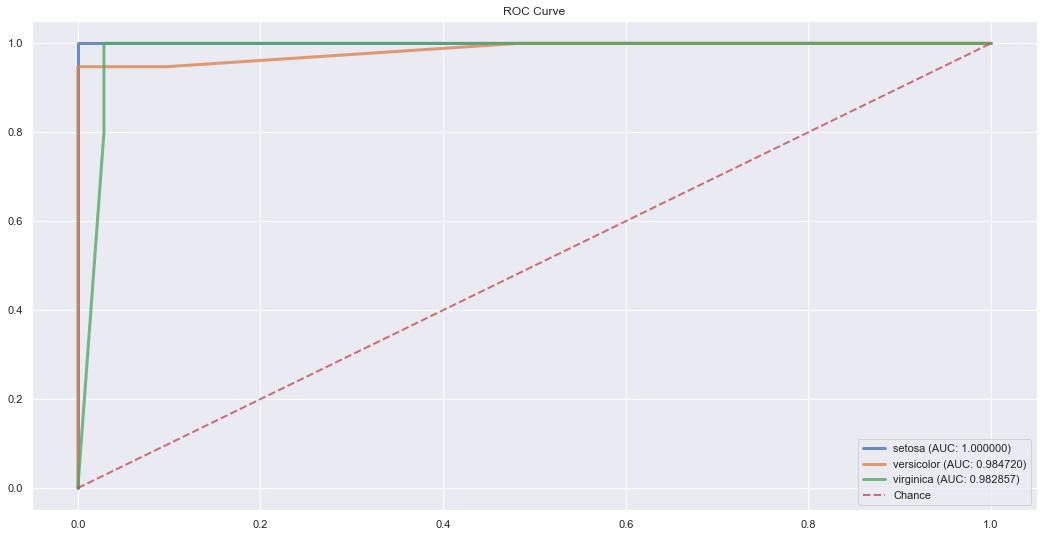

In [22]:
clf = sklearn.tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=300,
        max_depth=5,
        min_samples_leaf=4,
        min_impurity_decrease=0.1,
        class_weight={0:1, 1:5, 2:5}
).fit(X_train, Y_train)
probs = clf.predict_proba(X_test)

plt.figure(figsize=(18, 9))
for i in range(len(iris.target_names)):
    #plt.subplot(1, 3, i+1)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs[:, i], pos_label=i)
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, label=iris.target_names[i] + ' (AUC: {:2f})'.format(auc), alpha=0.8)

plt.plot([0,1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.legend()
plt.title('ROC Curve')
plt.show()

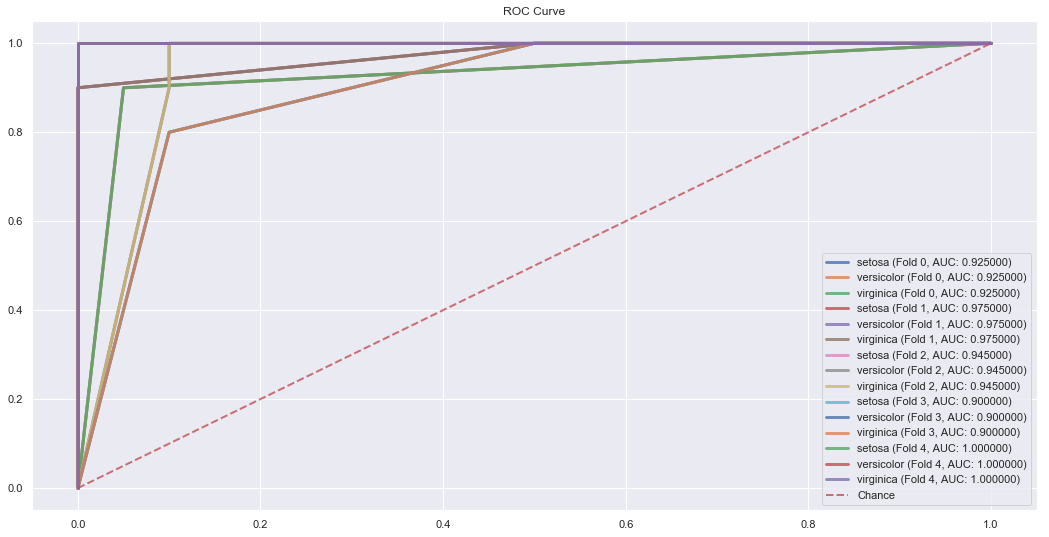

Accuracy: [0.93333333 0.96666667 0.93333333 0.86666667 1.        ] mean: 0.94
F1-Score: [0.93333333 0.96658312 0.93265993 0.86666667 1.        ] mean: 0.94


In [23]:
cv = cross_validation(
    sklearn.tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=300,
        max_depth=5,
        min_samples_leaf=4,
        min_impurity_decrease=0.1,
        class_weight={0:1, 1:5, 2:5}
    ), iris.data, iris.target, 
    iris.target_names, n_folds=5, plot=False, plot_roc=True
)